In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
# Function to convert the date format
def convert_date_format(date_str):
    try:
        date_time_obj = datetime.strptime(date_str, '%d/%m/%Y %H:%M')
        formatted_date = date_time_obj.strftime('%m/%d/%Y')
        return formatted_date
    except ValueError:
        pass

    try:
        date_time_obj = datetime.strptime(date_str, '%d/%m/%Y')
        return date_str
    except ValueError:
        raise ValueError(f"Unsupported date format: {date_str}")

In [3]:
df = pd.read_csv("../raw_data/australia.csv")

# Convert "endtime" to datetime format
df["endtime"] = df["endtime"].apply(convert_date_format)
df["endtime"] = pd.to_datetime(df["endtime"])
start_date = df['endtime'].min()
end_date = df['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df['week_number'] = ((df['endtime'] - start_date).dt.days // 14) + 1
week_number = df["week_number"]

/var/folders/zw/qzpy5wgd4tn7wdrrtkxfybwh0000gn/T/ipykernel_9099/1370087601.py:1: DtypeWarning: Columns (3,4,5,41,80,89,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../raw_data/australia.csv")


In [4]:
df["endtime"] = pd.to_datetime(df["endtime"])   
df = df.sort_values(by=["endtime"])
print(df)

       RecordNo    endtime    qweek i1_health i2_health i7a_health  \
0             0 2020-04-01   week 1         1         1          0   
380         380 2020-04-01   week 1         5         2          2   
381         381 2020-04-01   week 1         0        10          0   
382         382 2020-04-01   week 1         1        30          1   
383         383 2020-04-01   week 1         1         0          0   
...         ...        ...      ...       ...       ...        ...   
53695     53695 2022-03-28  week 54                                  
53773     53773 2022-03-28  week 54                                  
53747     53747 2022-03-28  week 54                                  
53820     53820 2022-03-28  week 54                                  
53832     53832 2022-03-28  week 54                                  

            i3_health          i4_health i5_health_1 i5_health_2  ... q_other  \
0      No, I have not  No, they have not                          ...     NaN 

In [5]:
frequency_dict = {"Always": 1, "Frequently": 1, "Sometimes": 0, "Rarely": 0, "Not at all": 0}
df["i12_health_1"] = df["i12_health_1"].map(frequency_dict)
print(df["i12_health_1"])

0        0
380      0
381      0
382      0
383      0
        ..
53695    1
53773    1
53747    0
53820    0
53832    0
Name: i12_health_1, Length: 53833, dtype: int64


In [6]:
# Assuming df is your original dataframe
df_count = df.groupby(["week_number", "state", "i12_health_1"]).size().unstack(fill_value=0).reset_index()
df_count.columns = ["week_number", "state", 
                    "wearing mask = 'No'", "wearing mask = 'Yes'"]

print(df_count)

     week_number                         state  wearing mask = 'No'  \
0              1  Australian Capital Territory                   23   
1              1               New South Wales                  395   
2              1            Northern Territory                   14   
3              1                    Queensland                  324   
4              1               South Australia                  155   
..           ...                           ...                  ...   
403           52                    Queensland                  109   
404           52               South Australia                   14   
405           52                      Tasmania                   10   
406           52                      Victoria                   99   
407           52             Western Australia                   10   

     wearing mask = 'Yes'  
0                       8  
1                     190  
2                       1  
3                      86  
4      

In [7]:
# plot figures in states. proportion
df_count["prop_no"] = df_count["wearing mask = 'No'"] / (df_count["wearing mask = 'No'"] + df_count["wearing mask = 'Yes'"])
df_count["prop_yes"] = df_count["wearing mask = 'Yes'"] / (df_count["wearing mask = 'No'"] + df_count["wearing mask = 'Yes'"])
print(df_count[df_count["state"]== "Australian Capital Territory"])

     week_number                         state  wearing mask = 'No'  \
0              1  Australian Capital Territory                   23   
8              2  Australian Capital Territory                   24   
16             3  Australian Capital Territory                   27   
24             4  Australian Capital Territory                    9   
32             5  Australian Capital Territory                   15   
40             6  Australian Capital Territory                    9   
48             7  Australian Capital Territory                   15   
56             8  Australian Capital Territory                   10   
64             9  Australian Capital Territory                   16   
72            10  Australian Capital Territory                    5   
80            11  Australian Capital Territory                   15   
88            12  Australian Capital Territory                   10   
96            13  Australian Capital Territory                   12   
104   

In [8]:
# the regulation dates
states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"],
    "Western Australia": ["23/4/2021", "9/9/2022"]
}

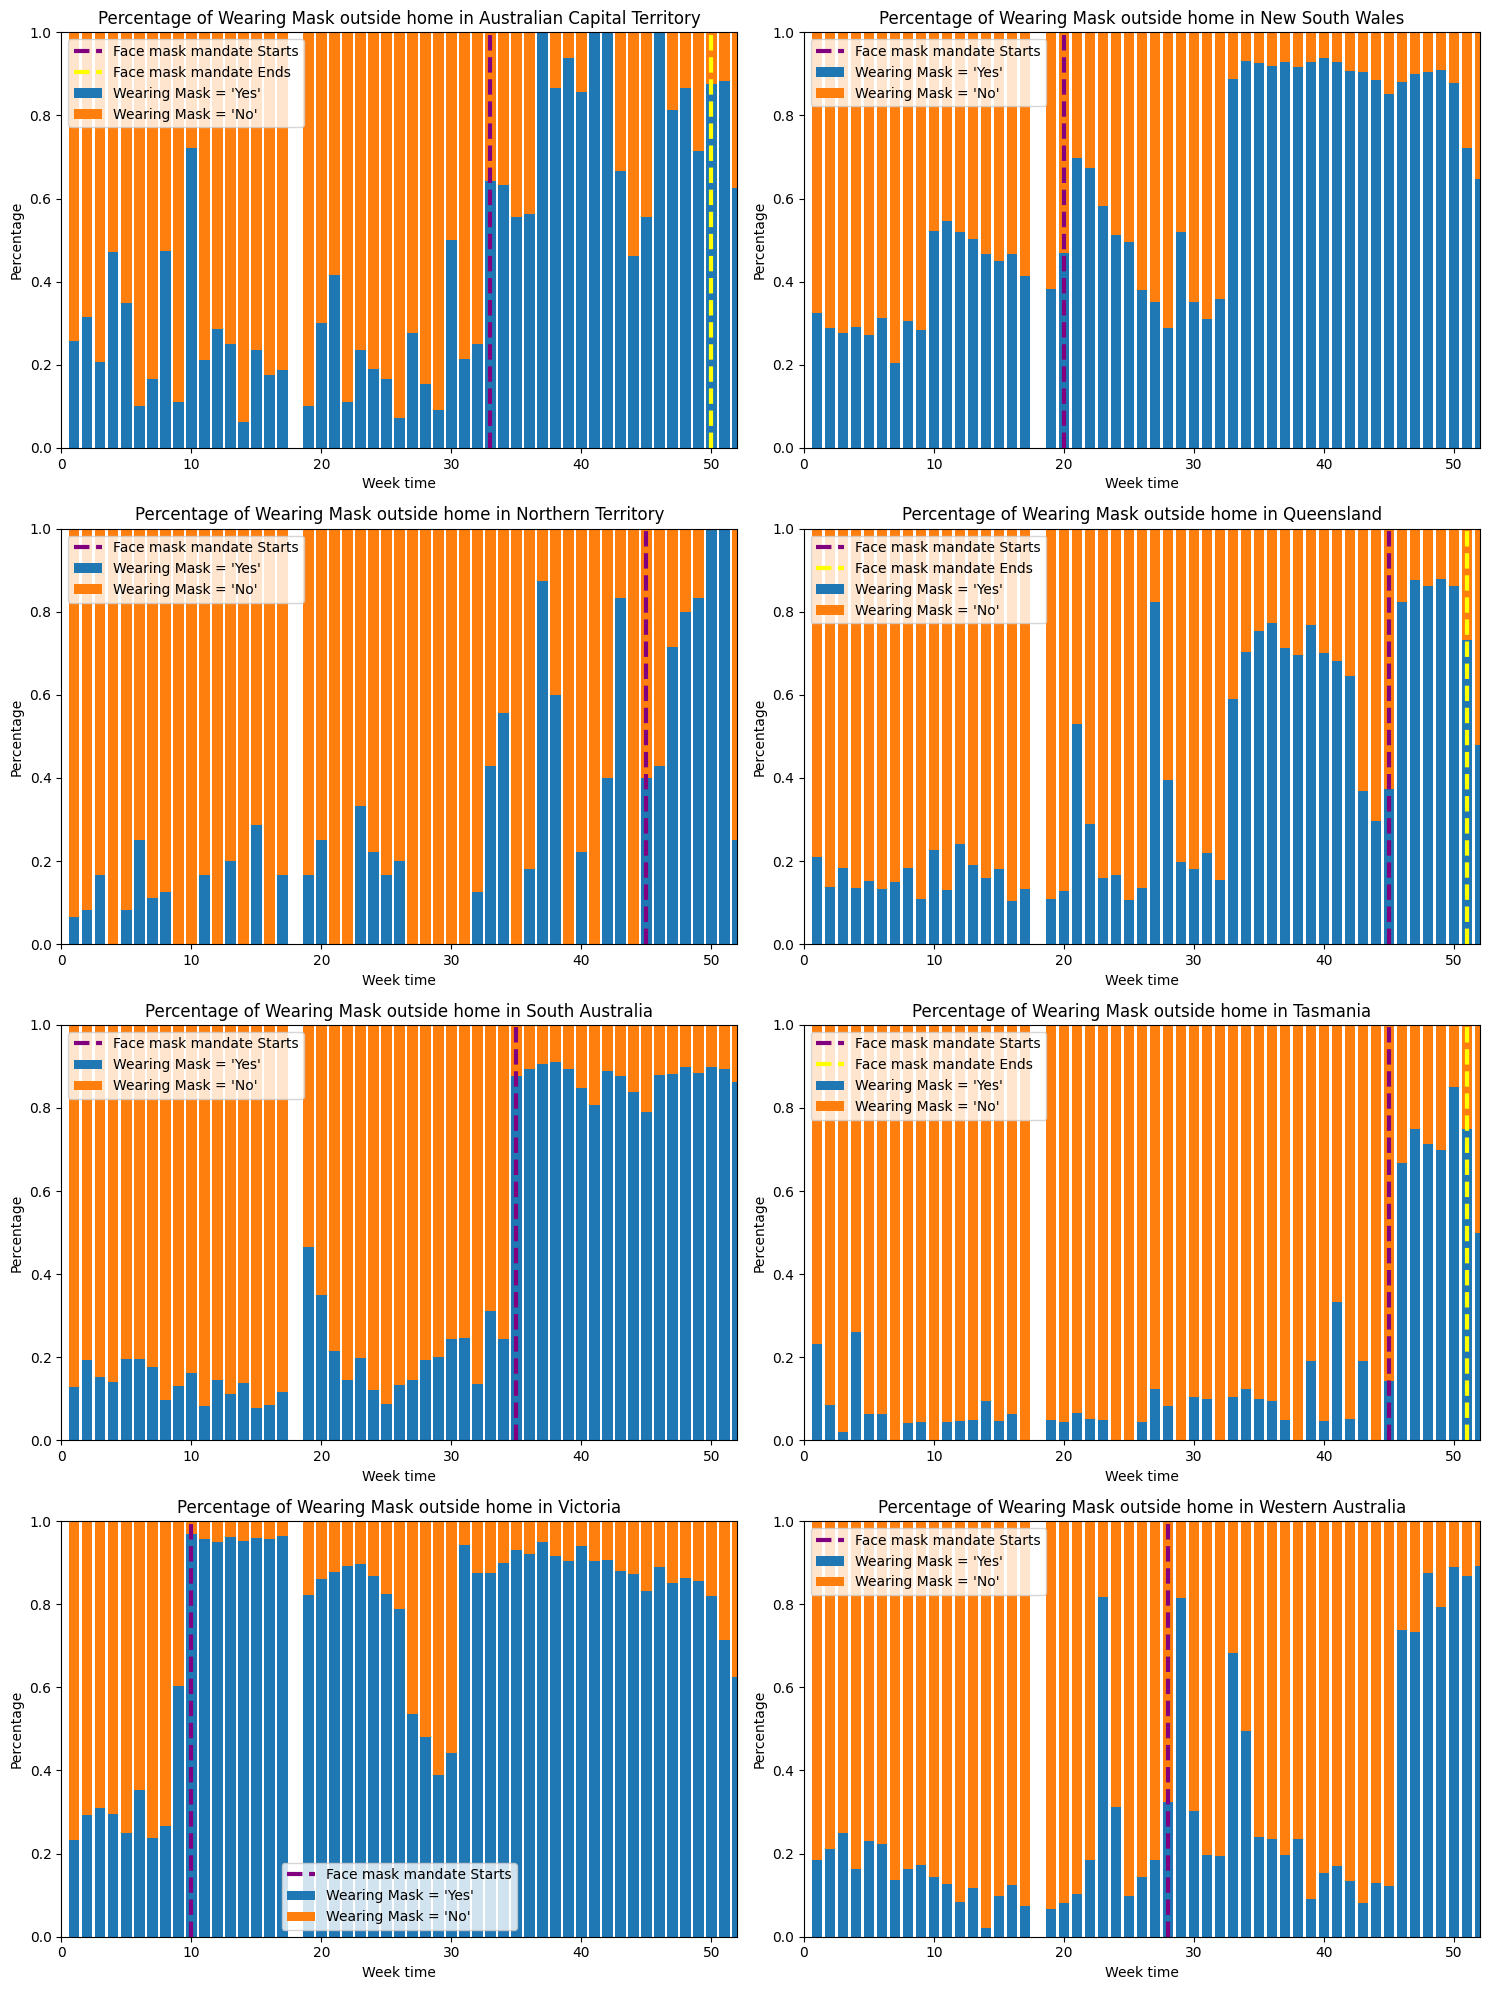

In [10]:
# Plotting figures for each state in two columns
states = df_count["state"].unique()
num_states = len(states)

fig, axes = plt.subplots(num_states // 2, 2, figsize=(15, 5 * (num_states // 2 + num_states % 2)))

for idx, state in enumerate(states):
    ax = axes[idx // 2, idx % 2] if num_states > 1 else axes
    
    state_df = df_count[df_count["state"] == state]
    
    ax.bar(state_df["week_number"], state_df["prop_yes"], label="Wearing Mask = 'Yes'")
    ax.bar(state_df["week_number"], state_df["prop_no"], bottom=state_df["prop_yes"], label="Wearing Mask = 'No'")
    
    # Add vertical lines for start and end times
    start_time, end_time = states_data[state]
    if start_time:
        start_time = pd.to_datetime(start_time, format='%d/%m/%Y')
        ax.axvline(x=((start_time - start_date).days // 14) + 1, color='purple', linestyle='--', linewidth = 3, label='Face mask mandate Starts')
    if end_time and (state == "Australian Capital Territory" or state == "Northen Territory" or state == "Queensland" or state == "Tasmania"):
        end_time = pd.to_datetime(end_time, format='%d/%m/%Y')
        ax.axvline(x=((end_time - start_date).days // 14) + 1, color='yellow', linestyle='--', linewidth = 3, label='Face mask mandate Ends')
        
    ax.set_title(f"Percentage of Wearing Mask outside home in {state}")
    ax.set_xlabel("Week time")
    ax.set_ylabel("Percentage")
    ax.set_xlim(0,52)
    ax.set_ylim(0, 1)  # Fixing y-axis at 1
    ax.legend()

plt.tight_layout()
plt.savefig("../figures/states_in_proportion.png")
plt.show()